In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

In [2]:
poke = pd.read_csv("pokemon_types.csv")
poke.index = poke.index +1
poke.head()

,Name,Type1,Type2
1,bulbasaur,Grass,Poison
2,ivysaur,Grass,Poison
3,venusaur,Grass,Poison
4,charmander,Fire,NaN
5,charmeleon,Fire,NaN


In [3]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    
    bbox = diff.getbbox()
    if bbox:
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        if height > width:
            d = height - width
            new_bbox = (bbox[0]-d//2, bbox[1], bbox[2] + (d-d//2), bbox[3])
        else:
            d = width - height
            new_bbox = (bbox[0], bbox[1]- d//2, bbox[2], bbox[3] + (d-d//2))
        
        desired_size = max(height, width)
        new_bbox = (max(bbox[0], 0), max(bbox[1], 0), min(im.size[0], bbox[2]), min(im.size[1], bbox[3]))
        cropped = im.crop(new_bbox)
        
        width = new_bbox[2] - new_bbox[0]
        height = new_bbox[3] - new_bbox[1]
        
        new_im = Image.new("RGB", (desired_size, desired_size), "WHITE")
        new_im.paste(cropped, ((desired_size-width)//2, (desired_size-height)//2))
        
        return new_im

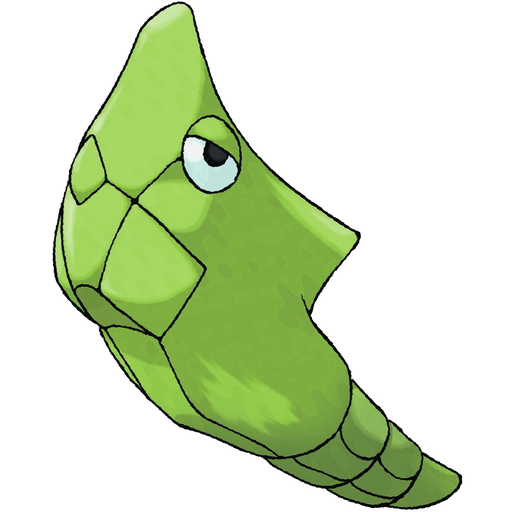

In [4]:
rt = "imgs/"
img = Image.open(os.path.join(rt, "11.jpg")).convert('RGBA')
new_image = Image.new("RGBA", img.size, "WHITE") 
new_image.paste(img, (0, 0), img)
img = new_image.convert('RGB')

img = img.rotate(-5, resample=Image.NEAREST,expand=True, fillcolor='white')

img = trim(img)

if img.size[0] < 512:
    img = img.resize((512,512), resample=Image.BILINEAR)

else:
    img = img.resize((512,512), resample=Image.LANCZOS)


#img = img.transpose(Image.FLIP_LEFT_RIGHT)
img

In [5]:
from os import walk

files = []
for (dirpath, dirnames, filenames) in walk("./imgs"):
    files = filenames
    break

In [6]:
to_remove = []
for f in files:
    file_type = f[-3:]
    name = f[:-4]
    
    if "._" in name:
        to_remove.append(f)
        continue
        
for r in to_remove:
    files.remove(r)
    print(r)
    #os.system("rm " + os.path.join(rt, r))
    
for f in files:
    file_type = f[-3:]
    name = f[:-4]
    try:
        ind = name.find("-")
        if ind != -1:
            num = int(name[:ind])
        else:
            num = int(name)
    except:
        print(f)

In [205]:
## Rotation and Fliplr to augment image data
aug_dir = "./augmented"
for f in files:
    file_type = f[-3:]
    name = f[:-4]
    
    ind = name.find("-")
    if ind != -1:
        num = int(name[:ind])
    else:
        num = int(name)
    
    img = Image.open(os.path.join(rt, f))
    if file_type == 'png':
        img = img.convert('RGBA')
        new_image = Image.new("RGBA", img.size, "WHITE") 
        new_image.paste(img, (0, 0), img)
        img = new_image.convert('RGB')
    
    #rotate
    for deg in np.arange(-15,16,5):
        if deg != 0:
            img_rot = img.rotate(deg, resample=Image.NEAREST, expand=True, fillcolor='white')
            img_rot = trim(img_rot)
        
        if img_rot.size[0] < 512:
            img_rot = img_rot.resize((512,512), resample=Image.BILINEAR)

        else:
            img_rot = img_rot.resize((512,512), resample=Image.LANCZOS) 
        
        dir_f = os.path.join(aug_dir, name+"_rot("+ str(deg) + ").jpg")
        img_rot.save(dir_f)
    
    #flip
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    
    #rotate
    for deg in np.arange(-15,16,5):
        if deg != 0:
            img_rot = img.rotate(deg, resample=Image.NEAREST, expand=True, fillcolor='white')
            img_rot = trim(img_rot)
        
        if img_rot.size[0] < 512:
            img_rot = img_rot.resize((512,512), resample=Image.BILINEAR)

        else:
            img_rot = img_rot.resize((512,512), resample=Image.LANCZOS) 
        
        dir_f = os.path.join(aug_dir, name+"_flipped_rot("+ str(deg) + ").jpg")
        img_rot.save(dir_f)


In [198]:
## Rotation and Fliplr to augment image data
single_aug_dir = "./single_augmented"
if not os.path.exists(single_aug_dir):
    os.system("mkdir " + single_aug_dir)
        
for f in files:
    file_type = f[-3:]
    name = f[:-4]
    
    ind = name.find("-")
        
    if ind != -1:
        num = int(name[:ind])
    else:
        num = int(name)
    
    img = Image.open(os.path.join(rt, f))
    if file_type == 'png':
        img = img.convert('RGBA')
        new_image = Image.new("RGBA", img.size, "WHITE") 
        new_image.paste(img, (0, 0), img)
        img = new_image.convert('RGB')
        
    sub_dir = os.path.join(single_aug_dir, str(num))
    if ind != -1 and name[ind+1:] != 'female':
        sub_dir += '_' + name[ind+1:]
        
    if not os.path.exists( sub_dir ):
        os.system("mkdir " + sub_dir )
    
    #rotate
    for deg in np.arange(-15,16,5):
        if deg != 0:
            img_rot = img.rotate(deg, resample=Image.NEAREST, expand=True, fillcolor='white')
            img_rot = trim(img_rot)
        
        if img_rot.size[0] < 512:
            img_rot = img_rot.resize((512,512), resample=Image.BILINEAR)

        else:
            img_rot = img_rot.resize((512,512), resample=Image.LANCZOS) 
        
        dir_f = os.path.join(sub_dir, name+"_rot("+ str(deg) + ").jpg")
        img_rot.save(dir_f)
    
    #flip
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    
    #rotate
    for deg in np.arange(-15,16,5):
        if deg != 0:
            img_rot = img.rotate(deg, resample=Image.NEAREST, expand=True, fillcolor='white')
            img_rot = trim(img_rot)
        
        if img_rot.size[0] < 512:
            img_rot = img_rot.resize((512,512), resample=Image.BILINEAR)

        else:
            img_rot = img_rot.resize((512,512), resample=Image.LANCZOS) 
        
        dir_f = os.path.join(sub_dir, name+"_flipped_rot("+ str(deg) + ").jpg")
        img_rot.save(dir_f)



In [ ]:
rt = "imgs/"
des_rt = "category/"
for f in files:
    file_type = f[-3:]
    name = f[:-4]
    
    ind = name.find("-")
    if ind != -1:
        num = int(name[:ind])
    else:
        num = int(name)
        
    img = Image.open(os.path.join(rt, f))
    if file_type == 'png':
        img = img.convert('RGBA')
        new_image = Image.new("RGBA", img.size, "WHITE") 
        new_image.paste(img, (0, 0), img)
        img = new_image.convert('RGB')
        
    
    if img.size[0] < 512:
        img = img.resize((512,512), resample=Image.BILINEAR)

    else:
        img = img.resize((512,512), resample=Image.LANCZOS)        
        
    tp1 = poke.loc[num,'Type1']
    tp2 = poke.loc[num,'Type2']
    
    if not os.path.exists(os.path.join(des_rt, tp1)):
        os.system("mkdir " + os.path.join(des_rt, tp1))
    dir_f1 = os.path.join(des_rt, tp1, name+"_1.png")
    img.save(dir_f1)
    
    if not tp2 is np.NaN:
        if not os.path.exists(os.path.join(des_rt, tp2)):
            os.system("mkdir " + os.path.join(des_rt, tp2))
        dir_f2 = os.path.join(des_rt, tp2, name+"_2.png")
        img.save(dir_f2)
        

In [7]:
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pickle

In [8]:
poke = pd.read_csv("pokemon.csv")
#poke.index = poke.index +1
poke.Legend = poke.Legend.astype('int64')
poke = poke[['#','Name','Type1','Type2', 'Generation', 'Legend']]

poke.head()

,#,Name,Type1,Type2,Generation,Legend
0,1,Bulbasaur,Grass,Poison,1,0
1,2,Ivysaur,Grass,Poison,1,0
2,3,Venusaur,Grass,Poison,1,0
3,3,Mega Venusaur,Grass,Poison,6,0
4,4,Charmander,Fire,None,1,0


In [11]:
image_size = 128
batch_size = 64
workers = 2

dataroot = "single_augmented/"

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

class_to_idx = dataset.class_to_idx
del dataset

In [23]:
types = set(poke.Type1.unique()).union(set(poke.Type2.unique()))
types = types - set('None')
types = list(types)
type_map = dict()
for i, j in enumerate(types):
    type_map[j] = i
    
idx_to_feat = {}
for class_name, class_index in class_to_idx.items():
    #print(class_name, class_index)
    names = class_name.split("_")
    index = names[0]
    if len(names) > 1:
        words = names[1].split("-")
        pat = ""
        for w in words:
            pat += '(?=.*%s)' % w
        #print(pat)
    
    select = poke[poke['#'] == int(index)]
    
    row = select
    if len(select) > 1:
        if len(names) > 1:
            row = select[select['Name'].str.lower().str.contains(pat)]
            if row.empty:
                row = select[select['Name'].str.contains(pat)]
            if row.empty:
                row = select.iloc[0]
        else:
            row = select.iloc[0]
        
    vals = row[['Type1','Type2','Generation','Legend']].values
    if len(vals) == 1:
        idx_to_feat[class_index] = vals[0]
    else:
        idx_to_feat[class_index] = vals
    if isinstance(idx_to_feat[class_index], str):
        print(names)
        print(select)
        print(row)
        print(idx_to_feat[class_index])
        print()

In [32]:
len(types)

19

In [24]:
def target_transform(t):    
    
    type_one_hot = np.zeros(len(types))
    feat = idx_to_feat[t]
    
    for tp in feat[:2]:
        if tp != 'None':
            try:
                type_one_hot[type_map[tp]] = 1
            except:
                print(t, feat, tp, feat[:2])
    
    gen_one_hot = np.zeros(7)
    gen_one_hot[int(feat[2])-1] = 1
    
    lgn = feat[3]
    return np.hstack([type_one_hot, gen_one_hot, lgn])

In [25]:
del dataset
del dataloader

In [26]:
image_size = 128
batch_size = 64
workers = 2

dataroot = "single_augmented/"

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]),
                          target_transform=target_transform)
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)


In [34]:
n_types = len(types)
n_types = 19

def fake_attr():
    
    type_one_hot = np.zeros(n_types)
    tp1 = random.randint(0, n_types-1)
    tp2 = random.randint(0, 1)
    if tp2 == 1:
        tp2 = random.randint(0, n_types-1)
    else:
        tp2 = -1
    
    type_one_hot[tp1] = 1
    if tp2 != -1:
        type_one_hot[tp2] = 1
    
    gen_one_hot = np.zeros(7)
    gen_id = random.randint(0, 6)
    gen_one_hot[gen_id] = 1
    
    lgn = random.randint(0, l)
    
    attr = np.hstack([type_one_hot, gen_one_hot, lgn])
    attr = Variable(torch.FloatTensor(attr)).view(1,-1)
    
    return attr


def fake_generator(batch_size, noise_size, device):
    noise = Variable(torch.FloatTensor(batch_size, noise_size)).to(device)
    noise.data.normal_(.0, 1)
    tag = torch.cat([fake_attr() for i in range(batch_size)], dim=0)
    tag = Variable(tag).to(device)
    return noise, tag